# Importing Neccesary Libraries

In [79]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

# Data Acquisition

In [80]:
data=load_boston()

In [81]:
print(data['DESCR'])

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [82]:
print(data.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [83]:
x=data['data']

In [84]:
x.shape

(506, 13)

In [85]:
y=data['target']

In [95]:

bst=pd.DataFrame(x)

In [96]:
bst.columns=data.feature_names

In [97]:
bst.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


### Scatter plot showing distribution of prices with age

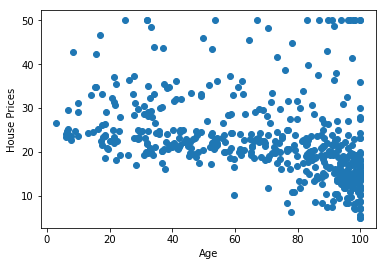

In [98]:
plt.scatter(x[:,6],y)
plt.ylabel('House Prices')
plt.xlabel('Age')
plt.show()

### Scatter plot showing distribution of prices with rooms

StandardScaler(copy=array([[6.3200e-03, 1.8000e+01, ..., 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, ..., 3.9690e+02, 9.1400e+00],
       ...,
       [1.0959e-01, 0.0000e+00, ..., 3.9345e+02, 6.4800e+00],
       [4.7410e-02, 0.0000e+00, ..., 3.9690e+02, 7.8800e+00]]),
        with_mean=True, with_std=True)

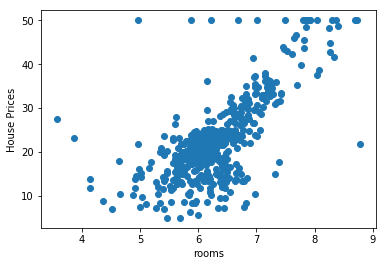

In [90]:
plt.scatter(x[:,5],y)
plt.ylabel('House Prices')
plt.xlabel('rooms')
plt.show()

# Data Preprocessing 

### Scaling Data

In [91]:
from sklearn.preprocessing import StandardScaler

In [100]:
sc=StandardScaler()

In [101]:
X=sc.fit_transform(x)

In [102]:
bst_scaled=pd.DataFrame(X)

In [103]:
bst_scaled.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.417713,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.415269,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.415272,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.414680,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.410409,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


# Linear model trained on original data

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
model=LinearRegression()

In [109]:
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [110]:
model.score(X,y)

0.7406077428649427

# PCA from scratch

In [177]:
def PCA(X, m=None):
    if m is None:
        m = X.shape[1]
        
    ## Find Covariance Matrix
    A = np.cov(X, rowvar=False)
    
    ## Eigenvalues and Eigenvectors
    eig_val, eig_vec = np.linalg.eig(A)
    
    ## Project points to new space
    Z = X.dot(eig_vec)
    
    ## Choose m dimensions
    red_Z = Z[:, -m-1:]
    
    return eig_val, eig_vec, Z, red_Z

In [112]:
eig_vals,eig_vecs,Z,redZ=PCA(X)

In [113]:
eig_vals

array([6.13477883, 1.43489911, 1.24362073, 0.85949754, 0.83621879,
       0.6609568 , 0.54008485, 0.39732939, 0.0636413 , 0.27798432,
       0.16950243, 0.18653252, 0.22069597])

In [114]:
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
for i in eig_pairs:
    print(i[0])

Eigenvalues in descending order:
6.134778826521775
1.4348991147158978
1.2436207346110535
0.8594975354344722
0.8362187850507374
0.6609567998255547
0.5400848534532185
0.3973293863725869
0.277984323592242
0.22069596603871824
0.18653252158644823
0.169502426511274
0.06364130054345232


In [115]:
tot = sum(eig_vals)
var_exp = [(i / tot)*100 for i in sorted(eig_vals, reverse=True)]

In [116]:
print(var_exp)

[47.09734428995888, 11.015871890111402, 9.547407585566765, 6.598453259264339, 6.419739836585927, 5.074235085313241, 4.146288400636595, 3.0503396187010687, 2.1341149804512334, 1.6943062154082194, 1.4320298479956872, 1.3012880113741765, 0.48858097863246286]


## Plot of Explained Variance Against each component

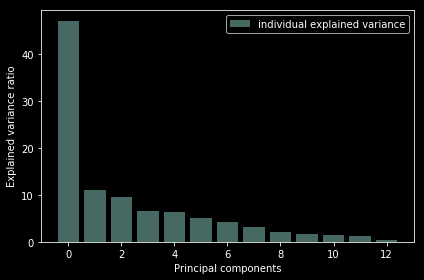

In [117]:
with plt.style.context('dark_background'):

    plt.bar(range(13), var_exp, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [118]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(13,1), 
                      eig_pairs[1][1].reshape(13,1)
                    ))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[-0.24959319  0.31318631]
 [ 0.25652131  0.32130825]
 [-0.3468611  -0.11181554]
 [-0.005099   -0.45672596]
 [-0.34297566 -0.21985693]
 [ 0.18943673 -0.15387677]
 [-0.31385097 -0.31174761]
 [ 0.32173451  0.34918069]
 [-0.31981745  0.2703984 ]
 [-0.33853899  0.23885931]
 [-0.20502118  0.30870354]
 [ 0.20273245 -0.23495727]
 [-0.30984085  0.07598235]]


### reorienting the axes

In [119]:
X_reduced=X.dot(matrix_w)

In [120]:
X_reduced.shape

(506, 2)

In [121]:
model2=LinearRegression()

In [122]:
model2.fit(X_reduced,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [123]:
model2.score(X_reduced,y)

0.45753830787066596

# PCA USING SKLEARN

In [124]:
from sklearn.decomposition import PCA

In [125]:
pca=PCA(n_components=9)

In [169]:
X_new=pca.fit_transform(X)

In [170]:
model2.fit(X_new,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [171]:
model2.score(X_new,y)

0.7056251654250376

In [172]:
r=pca.explained_variance_ratio_

In [173]:
l=[]
for i in r:
    l.append(i)

In [174]:
l

[0.4709734428995897,
 0.11015871890111406,
 0.09547407585566751,
 0.06598453259264356,
 0.06419739836585953,
 0.050742350853132466,
 0.041462884006365955,
 0.030503396187010794,
 0.021341149804512287]

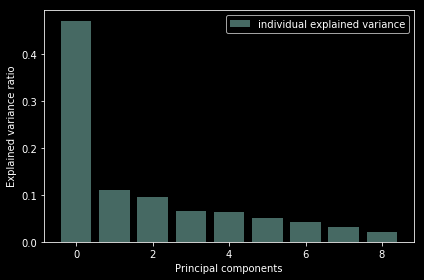

In [175]:
with plt.style.context('dark_background'):

    plt.bar(range(9), l, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()